# Prediction on Smartwatch Price

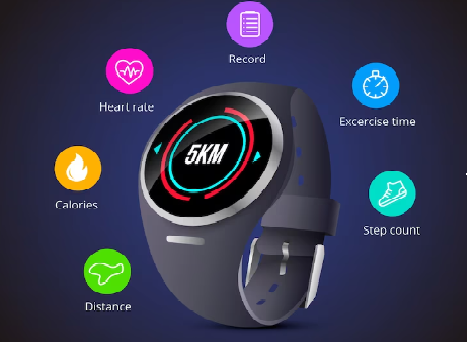

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
data=pd.read_csv("Smart watch prices.csv")

### Columns in Dataset
* Brand: the manufacturer of the smartwatch
* Model: the specific model of the smartwatch
* Operating System: the operating system used by the smartwatch (e.g. watchOS, Wear OS, Garmin OS, Fitbit OS, etc.)
* Connectivity: the types of connectivity supported by the smartwatch (e.g. Bluetooth, Wi-Fi, Cellular)
* Display Type: the type of display technology used by the smartwatch (e.g. AMOLED, Retina, E-Ink, LCD)
* Display Size (inches): the size of the smartwatch's display in inches
* Resolution: the resolution of the smartwatch's display in pixels
* Water Resistance (meters): the depth to which the smartwatch can be submerged in water without damage
* Battery Life (days): the estimated battery life of the smartwatch in days
* Heart Rate Monitor: whether or not the smartwatch has a built-in heart rate monitor
* GPS: whether or not the smartwatch has built-in GPS for location tracking
* NFC: whether or not the smartwatch has NFC (Near Field Communication) for contactless payments or other wireless data transfer.
* Price (USD): the price of the smartwatch in US dollars

## Basic Checks

In [3]:
# First five rows
data.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [4]:
# Last five rows
data.tail()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159
378,TicWatch,Pro 3,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,454 x 454,50,72,Yes,Yes,Yes,$299


In [5]:
# Shape of data
data.shape

(379, 13)

* Dataset contains 13 features with 379 observations.

In [6]:
# Columns in data
data.columns

Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Display Size (inches)', 'Resolution', 'Water Resistance (meters)',
       'Battery Life (days)', 'Heart Rate Monitor', 'GPS', 'NFC',
       'Price (USD)'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [8]:
# Statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Display Size (inches),376.0,1.363165,0.218986,0.9,1.2,1.39,1.4,4.01


In [9]:
# Statistics of data for categorical data
data.describe(include="O")

,Brand,Model,Operating System,Connectivity,Display Type,Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
count,378,378,376,378,377,375,378,378,378,378,378,378
unique,42,137,35,5,27,36,7,30,1,2,2,50
top,Garmin,Sense,Wear OS,"Bluetooth, Wi-Fi",AMOLED,454 x 454,50,14,Yes,Yes,Yes,$299
freq,34,15,131,293,207,90,275,83,378,348,317,57


## Data Preprocessing 

In [10]:
#Check ther number of unique value
data.select_dtypes(include='object').nunique()

Brand                         42
Model                        137
Operating System              35
Connectivity                   5
Display Type                  27
Resolution                    36
Water Resistance (meters)      7
Battery Life (days)           30
Heart Rate Monitor             1
GPS                            2
NFC                            2
Price (USD)                   50
dtype: int64

In [11]:
data.drop(columns='Model', inplace=True)
data.shape

(379, 12)

In [12]:
# Remove Dollar and Comma from Price (USD)
data['Price (USD)']=data['Price (USD)'].str.replace(',','').str.replace('$','')

In [13]:
# Convert the Price(USD) column to numeric values
data['Price (USD)']=pd.to_numeric(data['Price (USD)'])

In [14]:
data.head()

,Brand,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,399.0
1,Samsung,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,249.0
2,Garmin,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,399.0
3,Fitbit,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,229.0
4,Fossil,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,299.0


In [15]:
data['Battery Life (days)']=pd.to_numeric(data['Battery Life (days)'],errors='coerce')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Operating System           376 non-null    object 
 2   Connectivity               378 non-null    object 
 3   Display Type               377 non-null    object 
 4   Display Size (inches)      376 non-null    float64
 5   Resolution                 375 non-null    object 
 6   Water Resistance (meters)  378 non-null    object 
 7   Battery Life (days)        374 non-null    float64
 8   Heart Rate Monitor         378 non-null    object 
 9   GPS                        378 non-null    object 
 10  NFC                        378 non-null    object 
 11  Price (USD)                378 non-null    float64
dtypes: float64(3), object(9)
memory usage: 35.7+ KB


## Data Visualization

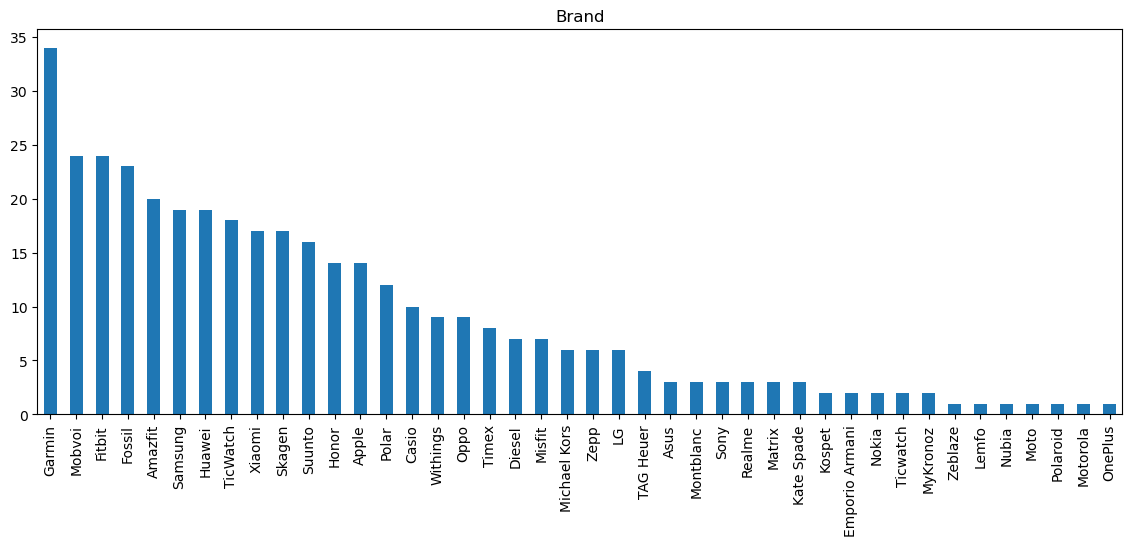

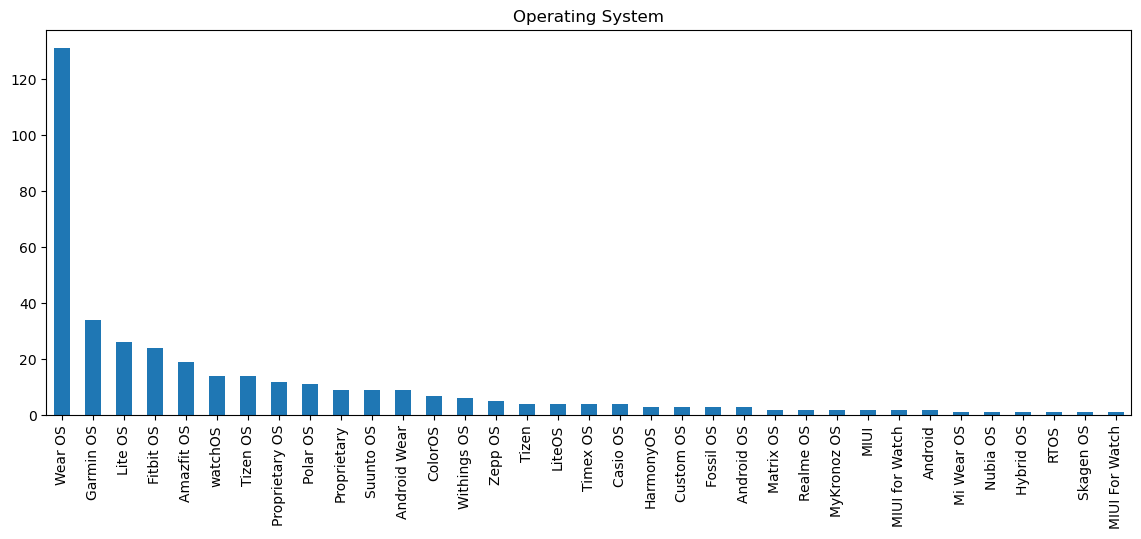

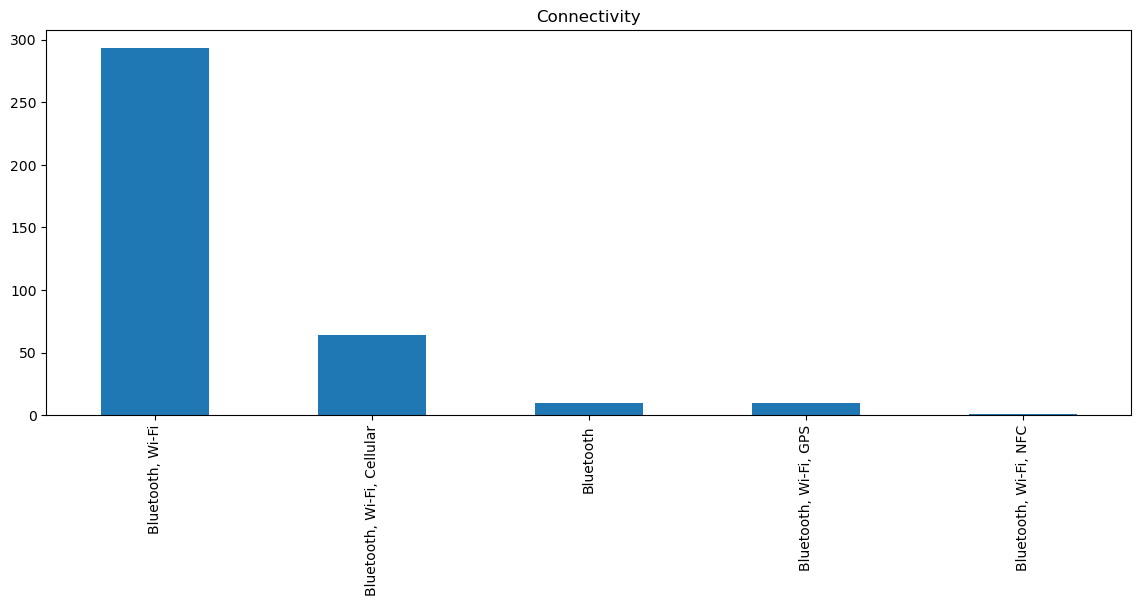

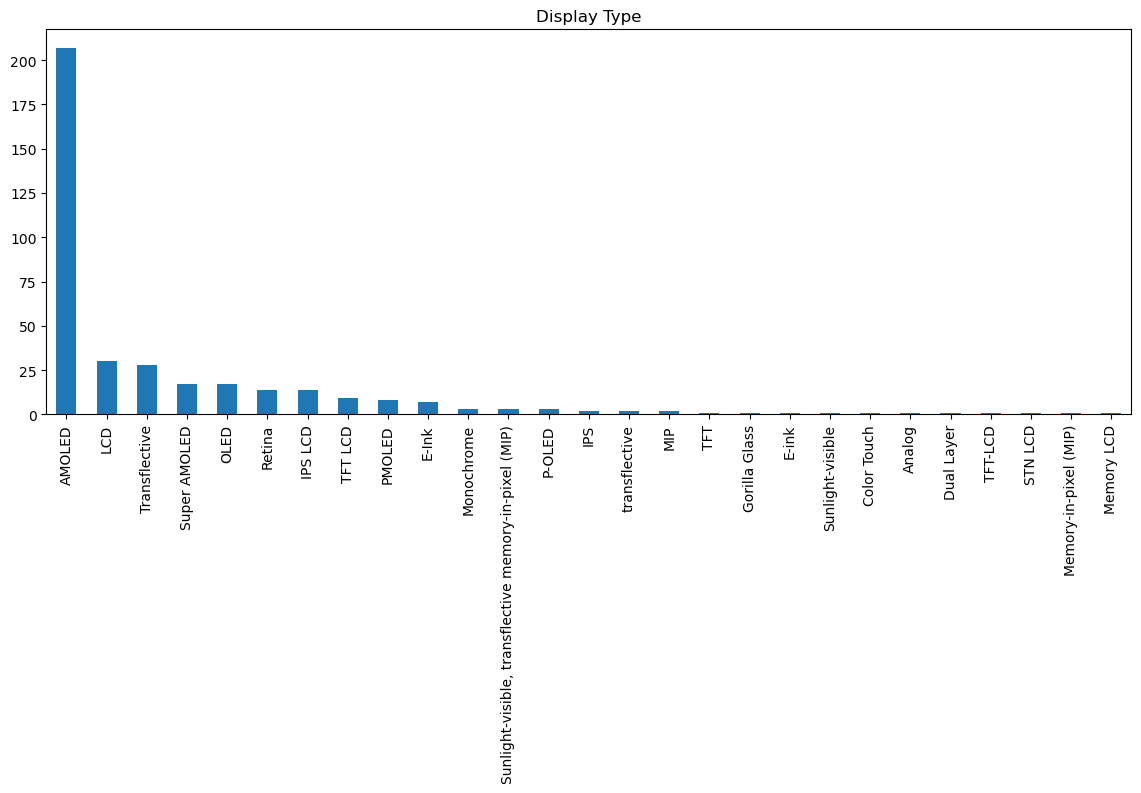

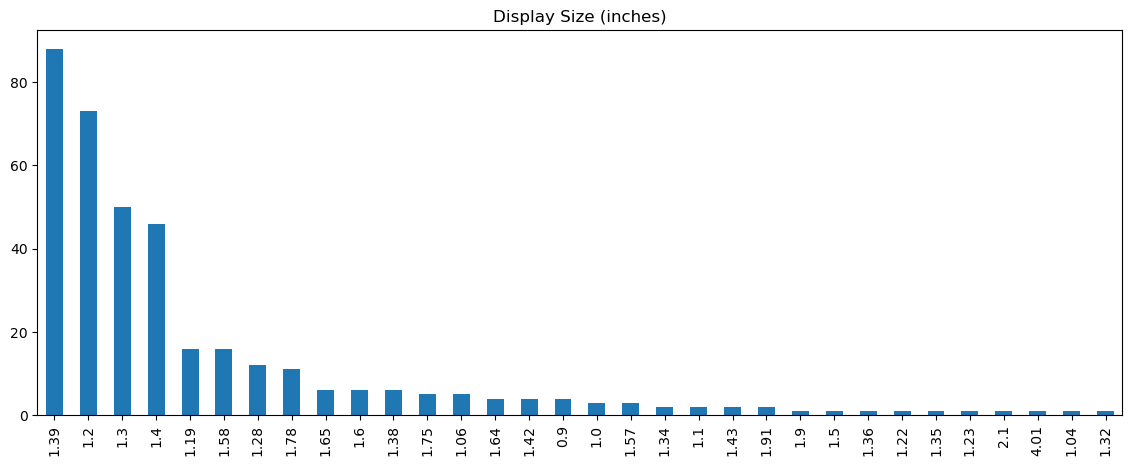

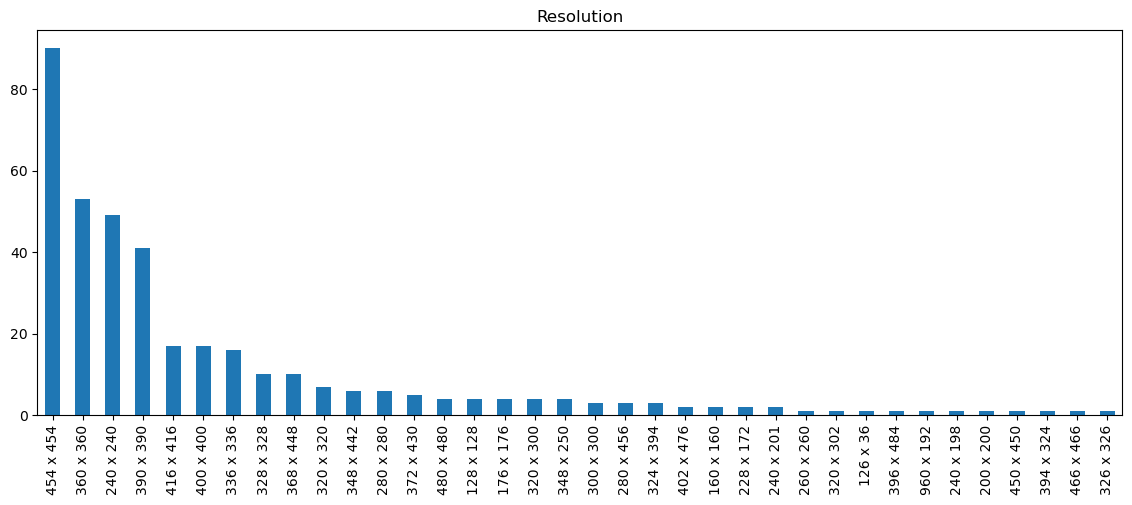

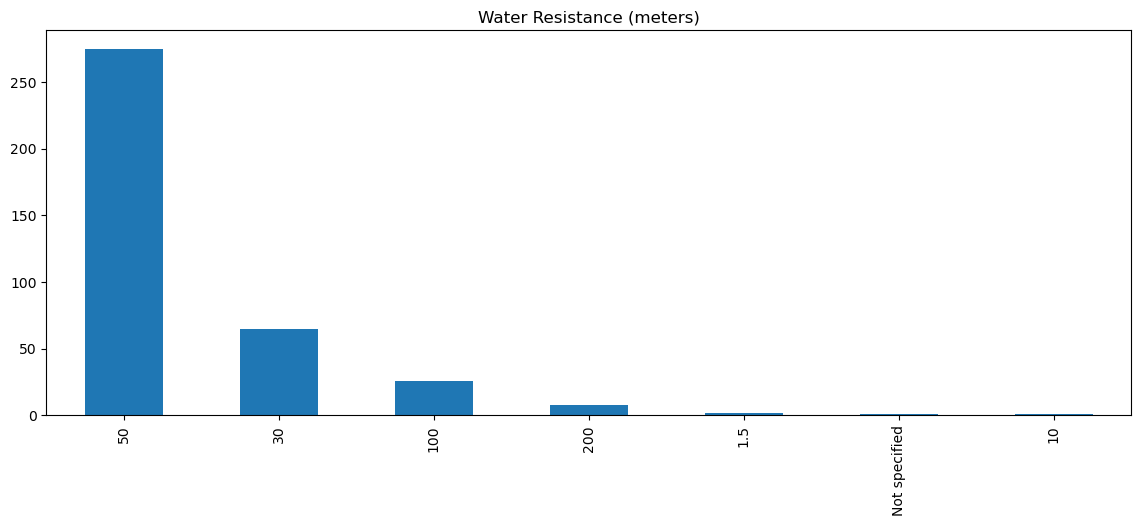

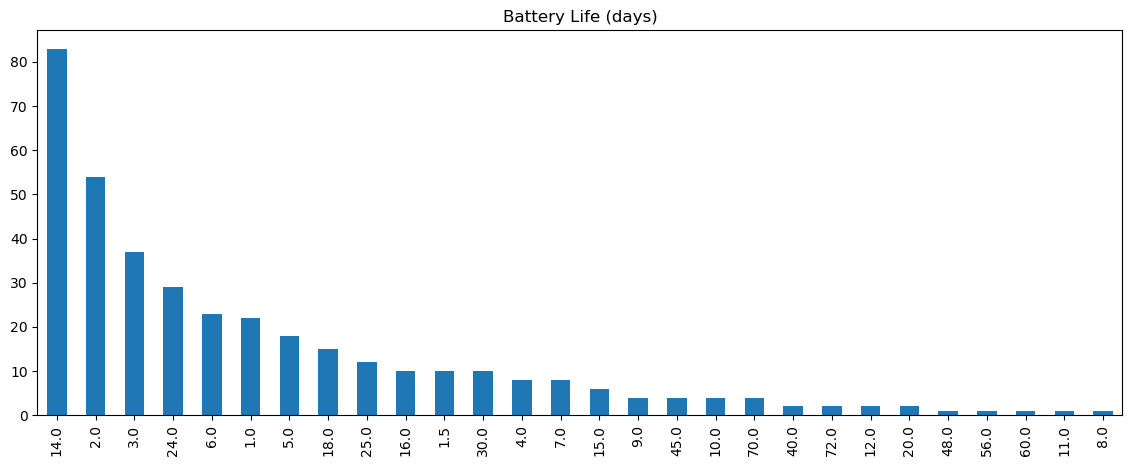

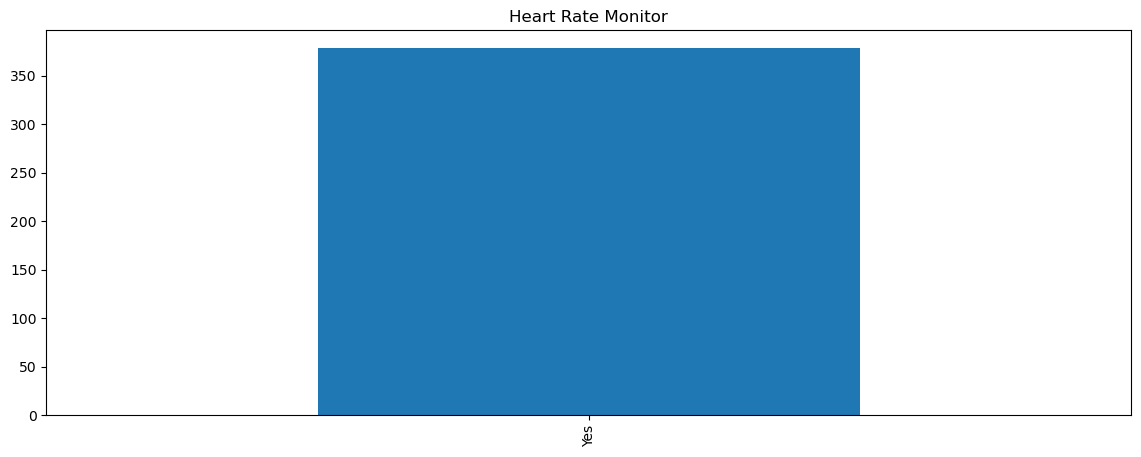

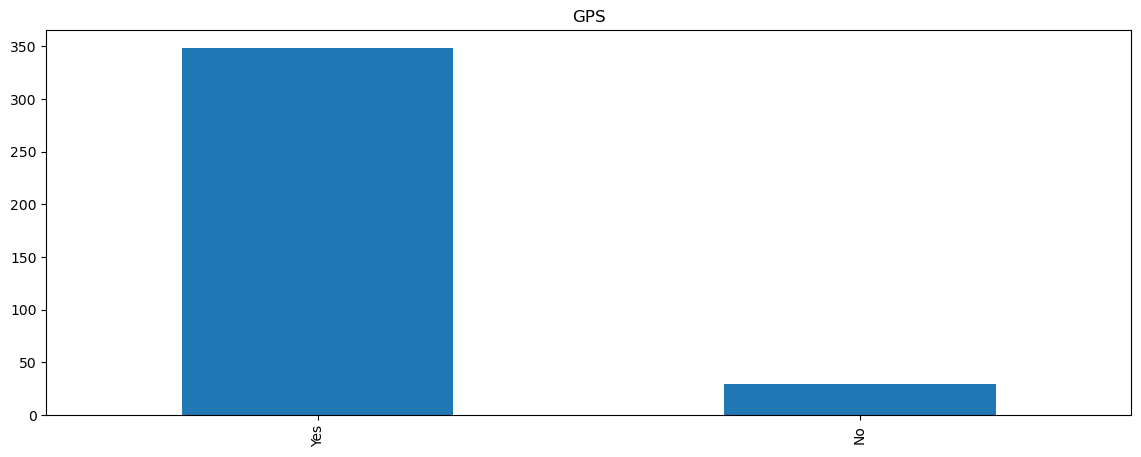

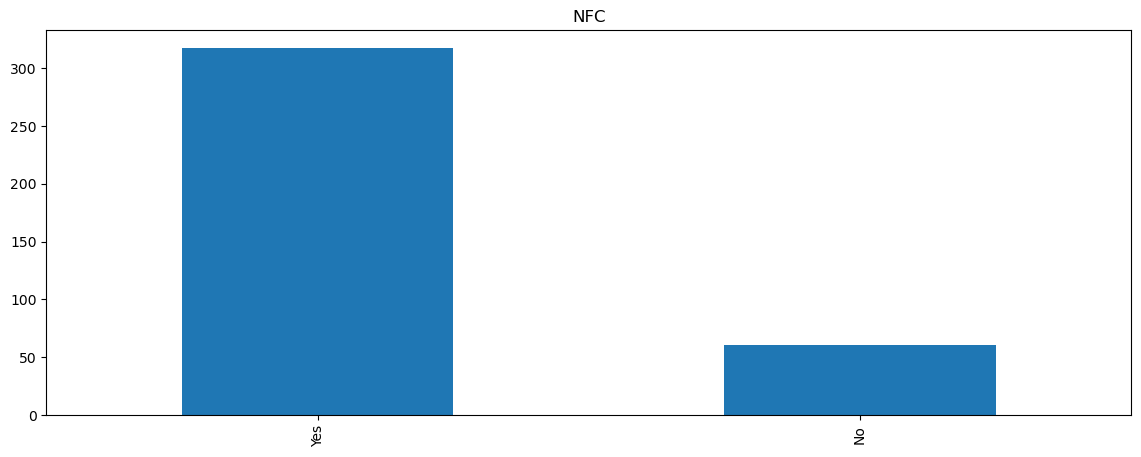

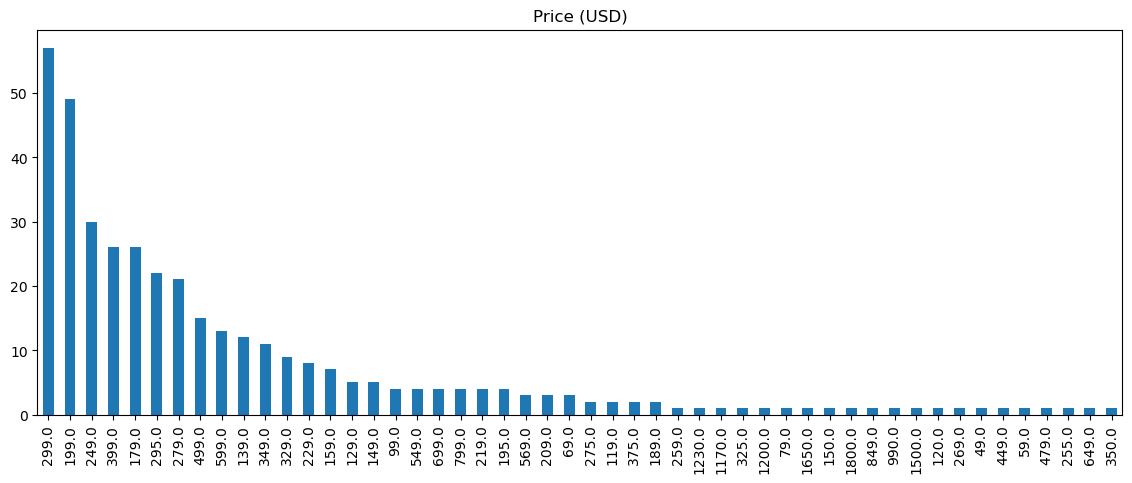

In [17]:
## Now draw bar graph for each of the features
for col in data.columns:
    data[col].value_counts().plot(kind = 'bar', title=col, figsize=(14,5))
    plt.xticks(rotation = 90)
    plt.show()

In [18]:
data.Brand.value_counts()

Garmin            34
Mobvoi            24
Fitbit            24
Fossil            23
Amazfit           20
Samsung           19
Huawei            19
TicWatch          18
Xiaomi            17
Skagen            17
Suunto            16
Honor             14
Apple             14
Polar             12
Casio             10
Withings           9
Oppo               9
Timex              8
Diesel             7
Misfit             7
Michael Kors       6
Zepp               6
LG                 6
TAG Heuer          4
Asus               3
Montblanc          3
Sony               3
Realme             3
Matrix             3
Kate Spade         3
Kospet             2
Emporio Armani     2
Nokia              2
Ticwatch           2
MyKronoz           2
Zeblaze            1
Lemfo              1
Nubia              1
Moto               1
Polaroid           1
Motorola           1
OnePlus            1
Name: Brand, dtype: int64

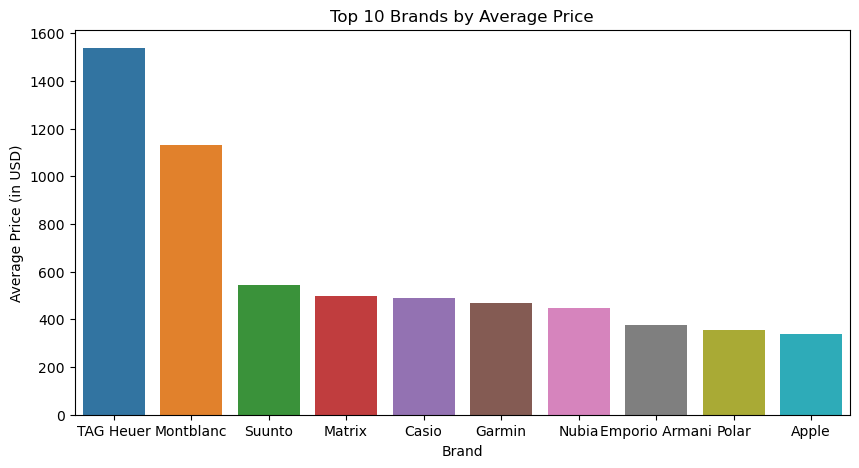

In [19]:
brand_prices = data.groupby('Brand')['Price (USD)'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=brand_prices.index, y=brand_prices.values)
plt.title('Top 10 Brands by Average Price')
plt.xlabel('Brand')
plt.ylabel('Average Price (in USD)')
plt.show()

In [20]:
data['Display Type'].value_counts()

AMOLED                                                   207
LCD                                                       30
Transflective                                             28
Super AMOLED                                              17
OLED                                                      17
Retina                                                    14
IPS LCD                                                   14
TFT LCD                                                    9
PMOLED                                                     8
E-Ink                                                      7
Monochrome                                                 3
Sunlight-visible, transflective memory-in-pixel (MIP)      3
P-OLED                                                     3
IPS                                                        2
transflective                                              2
MIP                                                        2
TFT                     

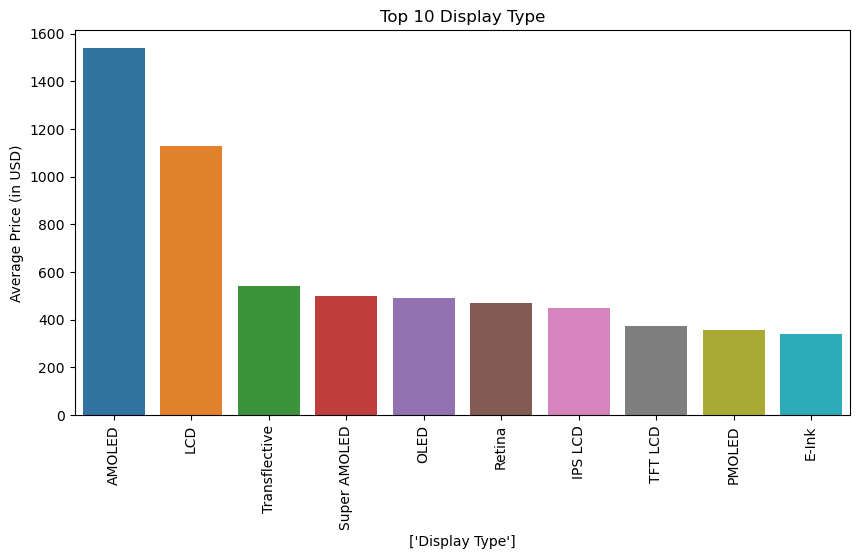

In [21]:
display_counts = data['Display Type'].value_counts()[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=display_counts.index, y=brand_prices.values)
plt.title('Top 10 Display Type')
plt.xlabel(['Display Type'])
plt.xticks(rotation=90)
plt.ylabel('Average Price (in USD)')
plt.show()

In [22]:
data['Resolution'].value_counts()

454 x 454    90
360 x 360    53
240 x 240    49
390 x 390    41
416 x 416    17
400 x 400    17
336 x 336    16
328 x 328    10
368 x 448    10
320 x 320     7
348 x 442     6
280 x 280     6
372 x 430     5
480 x 480     4
128 x 128     4
176 x 176     4
320 x 300     4
348 x 250     4
300 x 300     3
280 x 456     3
324 x 394     3
402 x 476     2
160 x 160     2
228 x 172     2
240 x 201     2
260 x 260     1
320 x 302     1
126 x 36      1
396 x 484     1
960 x 192     1
240 x 198     1
200 x 200     1
450 x 450     1
394 x 324     1
466 x 466     1
326 x 326     1
Name: Resolution, dtype: int64

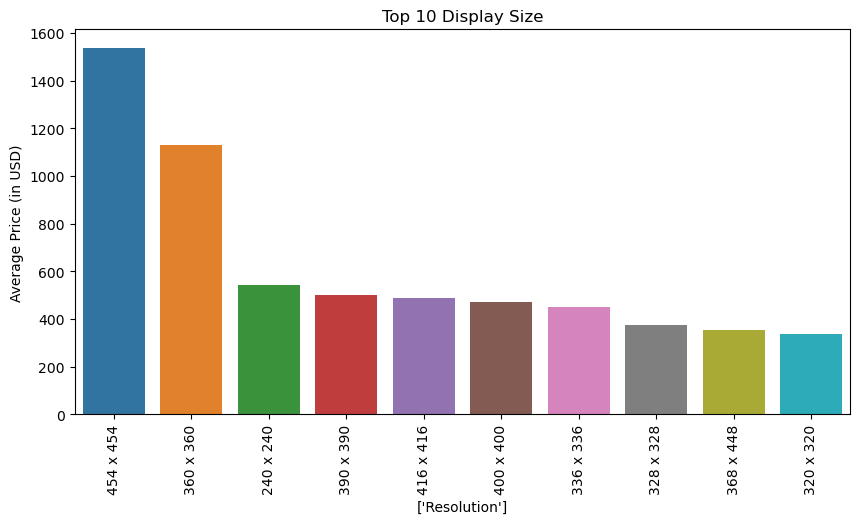

In [23]:
Resolution_count = data['Resolution'].value_counts()[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=Resolution_count.index, y=brand_prices.values)
plt.title('Top 10 Display Size')
plt.xlabel(['Resolution'])
plt.xticks(rotation=90)
plt.ylabel('Average Price (in USD)')
plt.show()

## Data preprocessing and Feature engineering

In [24]:
# Check missing values
data.isnull().sum()

Brand                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          5
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [25]:
check_missing = data.isnull().sum() * 100 /data.shape[0]

In [26]:
check_missing[check_missing > 0].sort_values(ascending=False)

Battery Life (days)          1.319261
Resolution                   1.055409
Operating System             0.791557
Display Size (inches)        0.791557
Display Type                 0.527704
Brand                        0.263852
Connectivity                 0.263852
Water Resistance (meters)    0.263852
Heart Rate Monitor           0.263852
GPS                          0.263852
NFC                          0.263852
Price (USD)                  0.263852
dtype: float64

In [27]:
data.dropna(inplace=True)
data.shape

(370, 12)

In [28]:
#Check the missing value
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [29]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
data_encoded = data.apply(lambda x:d[x.name].fit_transform(x))
data_encoded.head()

,Brand,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,1,31,2,16,27,26,5,16,0,1,1,31
1,28,28,2,0,17,30,5,21,0,1,1,18
2,8,9,1,0,10,29,5,11,0,1,0,31
3,6,7,1,0,21,18,5,6,0,1,1,17
4,7,28,1,0,9,29,4,18,0,1,1,25


#### Remove Outliers using Z-Score

In [30]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(data, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(data[col]))
        # remove rows with z-score greater than threshold in selected column
        data = data[(z < threshold) | (data[col].isnull())]
    return data

In [31]:
selected_cols = ['Display Size (inches)']
data_clean = remove_outliers(data_encoded, selected_cols)
data_clean.shape

(370, 12)

In [32]:
# drop Heart rate as it has only value 0
data_encoded.drop('Heart Rate Monitor',axis=1,inplace=True)

## Feature selection

In [33]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 378
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Brand                      370 non-null    int32
 1   Operating System           370 non-null    int32
 2   Connectivity               370 non-null    int32
 3   Display Type               370 non-null    int32
 4   Display Size (inches)      370 non-null    int64
 5   Resolution                 370 non-null    int32
 6   Water Resistance (meters)  370 non-null    int32
 7   Battery Life (days)        370 non-null    int64
 8   GPS                        370 non-null    int32
 9   NFC                        370 non-null    int32
 10  Price (USD)                370 non-null    int64
dtypes: int32(8), int64(3)
memory usage: 23.1 KB


In [34]:
# Checking redundant features
data_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Brand,370.0,17.202703,12.189537,0.0,7.00,15.0,29.00,39.0
Operating System,370.0,18.816216,10.178555,0.0,9.00,24.0,28.00,31.0
Connectivity,370.0,1.216216,0.522405,0.0,1.00,1.0,1.00,4.0
Display Type,370.0,6.543243,8.622748,0.0,0.00,0.0,13.00,25.0
Display Size (inches),370.0,13.200000,6.371345,0.0,6.00,16.0,17.00,29.0
Resolution,370.0,21.116216,8.948210,0.0,16.25,22.0,31.00,33.0
Water Resistance (meters),370.0,4.556757,0.915551,0.0,4.00,5.0,5.00,5.0
Battery Life (days),370.0,9.545946,6.945338,0.0,3.00,10.0,14.75,27.0
GPS,370.0,0.929730,0.255948,0.0,1.00,1.0,1.00,1.0
NFC,370.0,0.845946,0.361489,0.0,1.00,1.0,1.00,1.0


<AxesSubplot:>

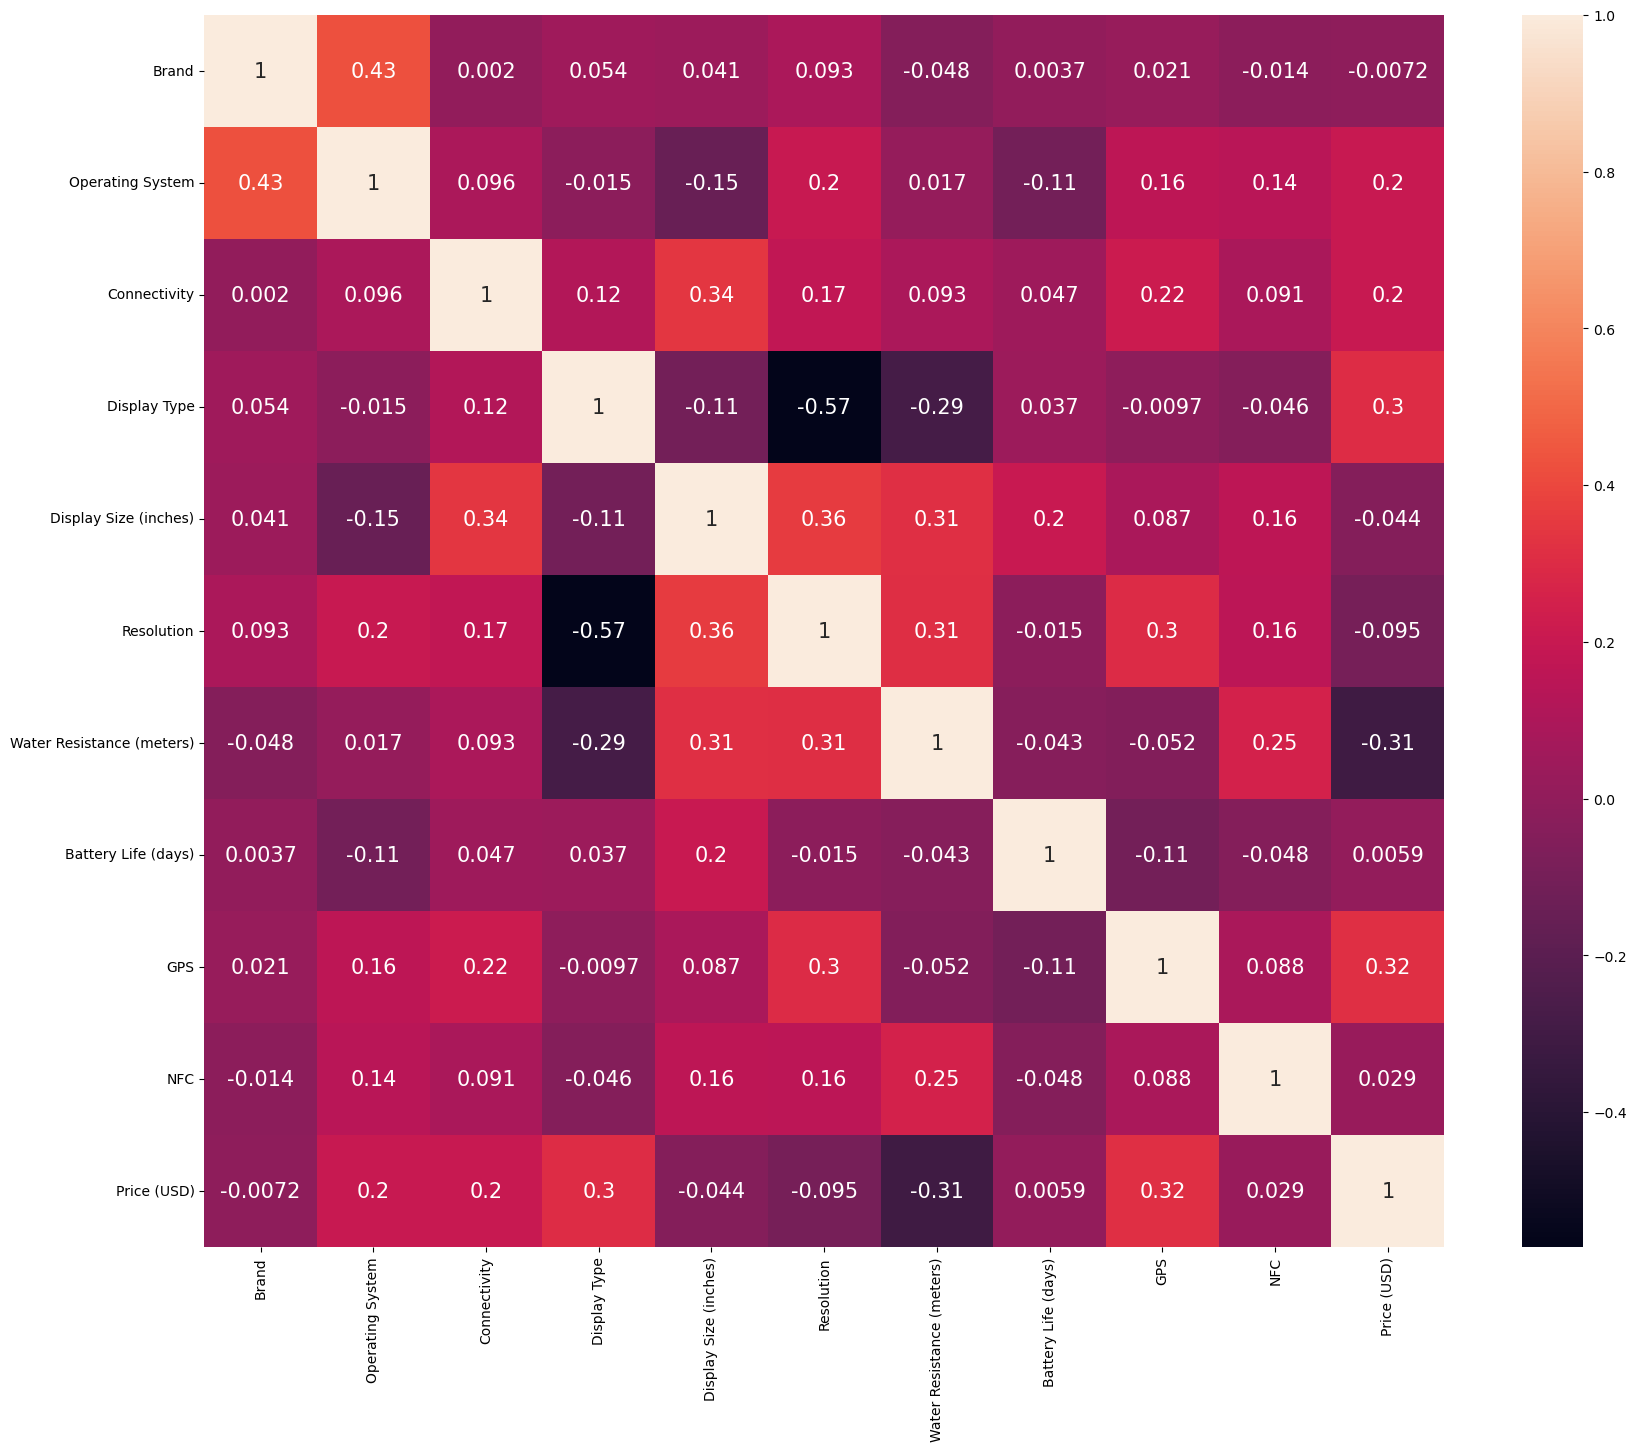

In [35]:
# Checking correlation
plt.figure(figsize=(20,16))
sns.heatmap(data_encoded.corr(),annot=True,annot_kws={"size":15})

## Model Creation

In [36]:
# Defining x and y
x = data_encoded.drop(['Price (USD)'], axis=1)
y = data_encoded['Price (USD)']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
print("x train shape:",x_train.shape)
print("x test shape:",x_test.shape)
print("y train shape:",y_train.shape)
print("y test shape:",y_test.shape)

x train shape: (296, 10)
x test shape: (74, 10)
y train shape: (296,)
y test shape: (74,)


### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred_lr = lr.predict(x_test)

In [42]:
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error
import math
print('Linear Regression R-squared:', r2_score(y_test, y_pred_lr))
print('Linear Regression Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lr))
print('Linear Regression Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R-squared: 0.294662820211789
Linear Regression Mean Absolute Error: 6.611935223427031
Linear Regression Mean Squared Error: 73.60713844027592
Linear Regression Root Mean Squared Error: 8.579460265091035


### Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [44]:
y_pred_dt = dt.predict(x_test)

In [45]:
print('Decision Tree R-squared:', r2_score(y_test, y_pred_dt))
print('Decision Tree Mean Absolute Error:', mean_absolute_error(y_test, y_pred_dt))
print('Decision Tree Mean Squared Error:', mean_squared_error(y_test, y_pred_dt))
print('Decision Tree Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree R-squared: 0.26633952856508725
Decision Tree Mean Absolute Error: 5.317117117117117
Decision Tree Mean Squared Error: 76.56288288288289
Decision Tree Root Mean Squared Error: 8.750021878994525


### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
y_pred_rf = rf.predict(x_test)

In [48]:
print('Random Forest R-squared:', r2_score(y_test, y_pred_rf))
print('Random Forest Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('Random Forest Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R-squared: 0.6093584851489079
Random Forest Mean Absolute Error: 4.663023190394733
Random Forest Mean Squared Error: 40.76632409027027
Random Forest Root Mean Squared Error: 6.384851140807456


In [49]:
data_encoded = [{'Model': 'Linear Regression', 'r2_score': r2_score(y_test,y_pred_lr),'Mean Absolute Error':mean_absolute_error(y_test, y_pred_lr),
                'Mean Squared Error':mean_squared_error(y_test, y_pred_lr),'Root Mean Squared Error':math.sqrt(mean_squared_error(y_test, y_pred_lr))},
         {'Model': 'Decision Tree', 'r2_score': r2_score(y_test,y_pred_dt),'Mean Absolute Error':mean_absolute_error(y_test, y_pred_dt),
                'Mean Squared Error':mean_squared_error(y_test, y_pred_dt),'Root Mean Squared Error':math.sqrt(mean_squared_error(y_test, y_pred_dt))},
         {'Model': 'Random Forest', 'r2_score': r2_score(y_test,y_pred_rf),'Mean Absolute Error':mean_absolute_error(y_test, y_pred_rf),
                'Mean Squared Error':mean_squared_error(y_test, y_pred_rf),'Root Mean Squared Error':math.sqrt(mean_squared_error(y_test, y_pred_rf))}]
  
data_encoded = pd.DataFrame.from_dict(data_encoded)
  
data_encoded

,Model,r2_score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.294663,6.611935,73.607138,8.579460
1,Decision Tree,0.266340,5.317117,76.562883,8.750022
2,Random Forest,0.609358,4.663023,40.766324,6.384851
